In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel(r"C:\Users\vishw\Downloads\Delhi .xlsx", header=2)

In [3]:
data.sort_values(by='date', inplace=True)

In [4]:
data.reset_index(drop=True, inplace=True)
data.head()

,date,pm25
0,2018-01-01 00:00:00,423
1,2018-01-01 01:00:00,414
2,2018-01-01 02:00:00,417
3,2018-01-01 03:00:00,466
4,2018-01-01 04:00:00,470


In [5]:
data['pm25'].replace(to_replace='-', value=np.nan, inplace=True)
data.isna().sum()

date     0
pm25    80
dtype: int64

In [6]:
data['pm25'].interpolate(method='linear',inplace=True)
data.head()

,date,pm25
0,2018-01-01 00:00:00,423.0
1,2018-01-01 01:00:00,414.0
2,2018-01-01 02:00:00,417.0
3,2018-01-01 03:00:00,466.0
4,2018-01-01 04:00:00,470.0


<AxesSubplot:>

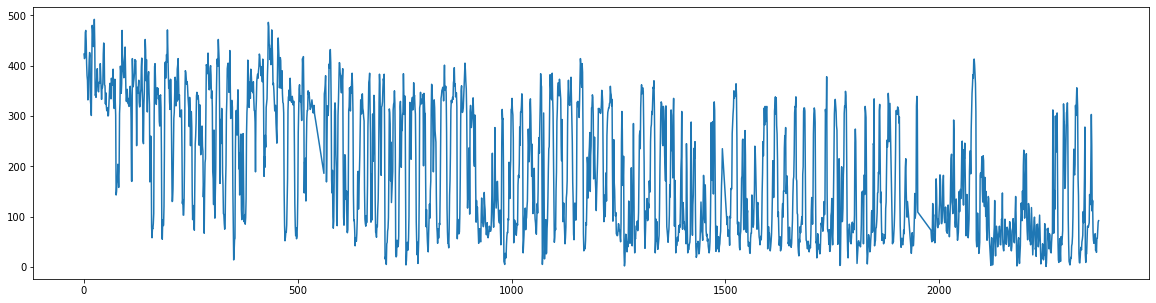

In [7]:
data['pm25'].plot(kind='line', figsize=(20,5) )

In [8]:
data1 = data.set_index(keys='date')
data1.head()

,pm25
date,
2018-01-01 00:00:00,423.0
2018-01-01 01:00:00,414.0
2018-01-01 02:00:00,417.0
2018-01-01 03:00:00,466.0
2018-01-01 04:00:00,470.0


In [9]:
# separate out a validation dataset
Train = data1[:2350]
Test = data1[2350:]
print("Train and Test =",len(Train), len(Test))

Train and Test = 2350 24


In [10]:
import warnings
warnings.simplefilter('ignore')

In [11]:
!pip install pystan
!pip install fbprophet

In [12]:
import pandas as pd
from fbprophet import Prophet

In [14]:
data.columns = ['ds', 'y']
data.head()

,ds,y
0,2018-01-01 00:00:00,423.0
1,2018-01-01 01:00:00,414.0
2,2018-01-01 02:00:00,417.0
3,2018-01-01 03:00:00,466.0
4,2018-01-01 04:00:00,470.0


In [16]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [18]:
future = m.make_future_dataframe(periods=24,freq='H')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01 00:00:00,341.225037,222.971491,521.910152,341.225037,341.225037,35.544373,35.544373,35.544373,53.315189,53.315189,53.315189,-17.770816,-17.770816,-17.770816,0.0,0.0,0.0,376.769410
1,2018-01-01 01:00:00,341.079734,227.419797,534.346587,341.079734,341.079734,38.796449,38.796449,38.796449,56.465984,56.465984,56.465984,-17.669535,-17.669535,-17.669535,0.0,0.0,0.0,379.876183
2,2018-01-01 02:00:00,340.934431,232.027284,536.434781,340.934431,340.934431,39.535343,39.535343,39.535343,57.064270,57.064270,57.064270,-17.528927,-17.528927,-17.528927,0.0,0.0,0.0,380.469774
3,2018-01-01 03:00:00,340.789128,228.905452,524.277925,340.789128,340.789128,40.765908,40.765908,40.765908,58.116235,58.116235,58.116235,-17.350327,-17.350327,-17.350327,0.0,0.0,0.0,381.555036
4,2018-01-01 04:00:00,340.643825,236.981687,544.647313,340.643825,340.643825,43.731079,43.731079,43.731079,60.866279,60.866279,60.866279,-17.135200,-17.135200,-17.135200,0.0,0.0,0.0,384.374904


In [23]:
forecast[['ds','yhat']].tail(24)

,ds,yhat
2374,2018-04-20 01:00:00,162.512110
2375,2018-04-20 02:00:00,163.273730
2376,2018-04-20 03:00:00,164.464221
2377,2018-04-20 04:00:00,167.326356
2378,2018-04-20 05:00:00,172.067137
2379,2018-04-20 06:00:00,177.608340
2380,2018-04-20 07:00:00,180.561797
2381,2018-04-20 08:00:00,175.499277
2382,2018-04-20 09:00:00,157.837027
2383,2018-04-20 10:00:00,127.767524


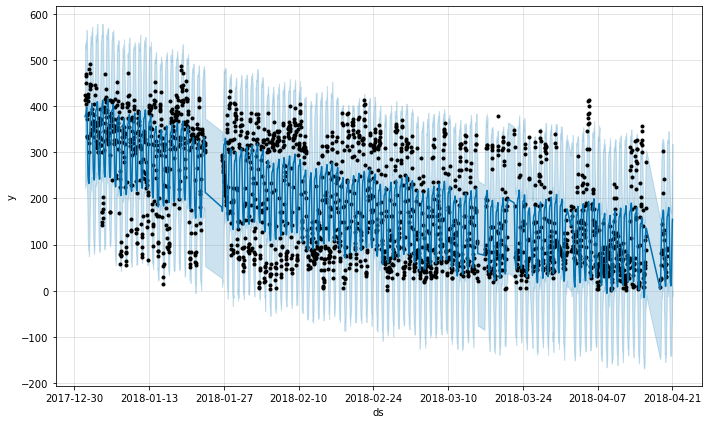

In [19]:
plot1 = m.plot(forecast)

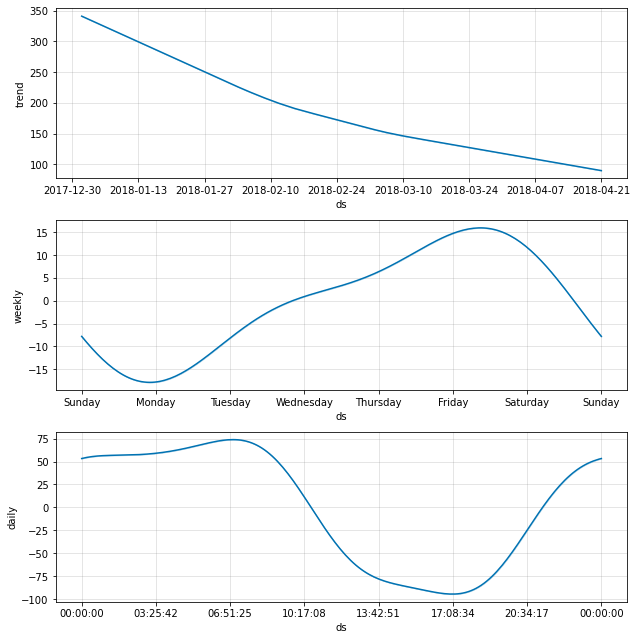

In [20]:
plt2 = m.plot_components(forecast)